<a href="https://colab.research.google.com/github/svhenrique/analise-dataset-heart-disease/blob/master/semana4/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados sobre mortalidade da insuficiênia cardíaca**


*   O dataset contém 12 recursos que podem ser usados para prever a morte por insuficiência cardíaca.
* [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)   
* Atributos numéricos descrevem:
  * age
    * idade
  * anaemia
    * anemia
  * creatinine_phosphokinase
    * creatinina fosfoquinase 
  * diabetes
    * diabetes
  * ejection_fraction
    * fração de ejeção
  * high_blood_pressure
    * hipertensão arterial
  * platelets
    * plaquetas
  * serum_creatinine
    * creatinina sérica
  * serum_sodium
    * sódio sérico
  * sex
    * sexo
  * smoking
    * fumante
  * time
    * tempo
  * DEATH_EVENT
    * morte

* 298 instâncias
* Problema de classificação binária 

* Mais detalhes sobre a  organização e análise preliminar dos dados desse dataset
[estão aqui](https://github.com/svhenrique/analise-dataset-heart-disease/blob/master/Untitled0.ipynb).

* Mais detalhes sobre os testes feitos com Arvore de Decisão e Random Forest [estão aqui](https://github.com/svhenrique/analise-dataset-heart-disease/blob/master/semana2/Untitled1.ipynb).

* Mais detalhes sobre os testes feitos com Rede Neural (MLP) [estão aqui](https://github.com/svhenrique/analise-dataset-heart-disease/blob/master/semana3/Untitled2.ipynb).

##**1. Importando bibliotecas e métodos necessários**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

##**2. Lendo os dados do dataset**

In [4]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('https://raw.githubusercontent.com/svhenrique/analise-dataset-heart-disease/master/heart_failure_clinical_records_dataset.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## **3. Limpando e organizando os dados para modelagem**


In [5]:
# excluindo colunas irrelevantes

# time é uma coluna irrelevante pois representa o tempo de acompanhamento
# que a pessoa teve pelos pesquisadores
# isso não ajudaria no processo de classificação ou agrupamento

dados = dados.drop(columns=['time'])
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [6]:
# verificando se existem valores NAN, ? ou dados faltantes
dados.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
DEATH_EVENT                 False
dtype: bool

## **4. Re-escala dos dados**

In [7]:
# Reescala usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,1.0



##**5. Organizando dados para modelagem**


In [8]:
# X recebe os atributos descritores
tam = len(dados.columns)
X = dados.iloc[:,0:(tam-1)]
print("Coluna apagada: ", set(dados.columns) -set(X.columns))
X.head()

Coluna apagada:  {'DEATH_EVENT'}


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [9]:
# y recebe o atributo de classe (target)
y = dados.DEATH_EVENT
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: DEATH_EVENT, Length: 299, dtype: float64

## **6. Definindo os algoritmos de agrupamento**

### **Agrupamento por partição**

#### **Iniciando e aplicando o modelo**

In [ ]:
# iniciando modelo para agrupamento

# Como o nosso dataset reflete um problema de classificação binária, para formar grupos
# é necessário apenas 2 clusters

kmeans = KMeans(n_clusters=2)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# agrupando os dados em X
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# aplicando o modelo aos dados de teste
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtyp

#### **Visualizando os resultados do agrupamento**

In [ ]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0


In [ ]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')

In [ ]:
# transformando as labels em um dataframe
grupos = pd.DataFrame(kmeans_labels)
grupos

,0
0,1
1,1
2,1
3,1
4,0
...,...
294,1
295,0
296,0
297,1


In [ ]:
# adicionando as labels ao teste para fins de visualização

# X.shape dá a dimensionalidade e X.shape[1] retorna  o número de colunas + 1, basicamente.

# DEATH_EVENT é o campo de previsão de morte por insuficiência cardíeca
# no dataset original

X.insert((X.shape[1]),'DEATH_EVENT',grupos)
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,1
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,1


In [ ]:
dados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.0


In [ ]:
# como, até agora, não sabemos qual label pertence a qual classe nos grupos
# chamaremos de classe0 (para as classes com 0) e classe1 (para as classes com 1)
classe0 = X[X['DEATH_EVENT']==0]
classe1 = X[X['DEATH_EVENT']==1]

In [ ]:
# redimensionando as figuras para que a vizualização do gráfico 3d seja melhor
plt.rcParams["figure.figsize"] = (14,11)

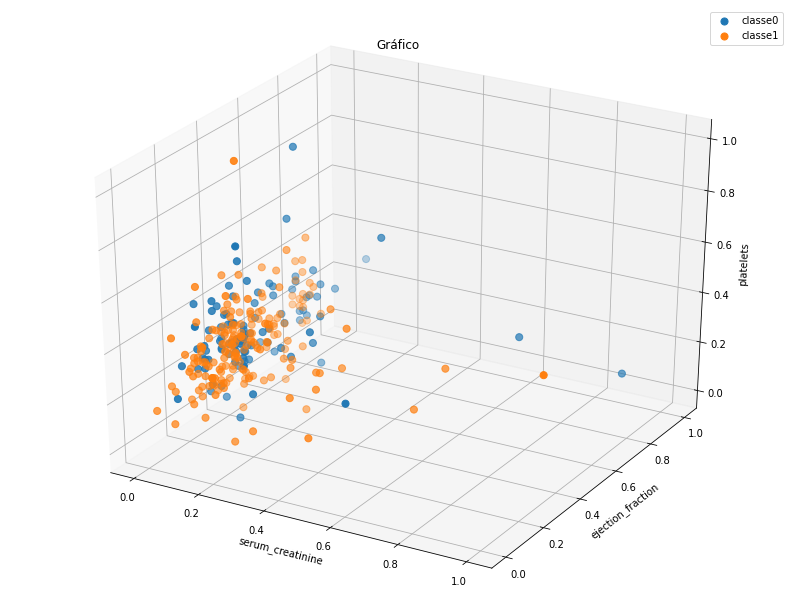

In [ ]:
# escolhi os atributos serum_creatinine e ejection_fraction
# pois, na análise feita preliminarmente (link do notebook no cabeçalho), esses
# são os atributos mais promissores para discriminar as classes. Usarei, também,
# o atributo platelets e, então, plotar um gráfico 3d (o atributo platelets também é 
# adequado para a discriminação).

ax = plt.axes(projection='3d')
ax.scatter3D(classe0.serum_creatinine,classe0.ejection_fraction,classe0.platelets,s=50,label='classe0')
ax.scatter3D(classe1.serum_creatinine,classe1.ejection_fraction,classe1.platelets,s=50,label='classe1')
plt.legend()
ax.set_xlabel('serum_creatinine')
ax.set_ylabel('ejection_fraction')
ax.set_zlabel('platelets')
plt.title('Gráfico')
plt.show()


**Conclusão gráfico 3d**

---


Em uma análise preliminar, podemos observar que a classe0 possui valores de serum_creatinine e ejection_fraction maiores em relação a classe1. Isso é uma evidência de que a classe1 talvez seja a classe dos mortos por insuficiência cardíeca, porém, ainda não existem provas suficientes para fazer essa conclusão.

OBS: Na análise preliminar dos dados feita (link no cabeçalho), foi descoberto que as pessoas que morreram por insuficiência cardíeca tinham níveis menores de serum_creatinine e ejection_fraction. Algums tinham, também, nívels mais baixos de platelets quando comparados aos que permaneceram vivos.

---





In [ ]:
# redimensionando as figuras para que a vizualização dos gráficos a seguir seja melhor
plt.rcParams["figure.figsize"] = (65,60)

In [ ]:

dados.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [ ]:
classe0.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0
8,0.454545,0.0,0.017096,0.0,0.772727,0.0,0.288833,0.112360,0.714286,0.0,0.0,0
14,0.163636,1.0,0.007272,0.0,0.242424,1.0,0.487211,0.056180,0.714286,0.0,0.0,0
18,0.545455,1.0,0.013014,0.0,0.166667,1.0,0.256880,0.056180,0.771429,0.0,0.0,0
19,0.145455,1.0,0.071319,1.0,0.621212,0.0,0.075039,0.157303,0.228571,0.0,0.0,0


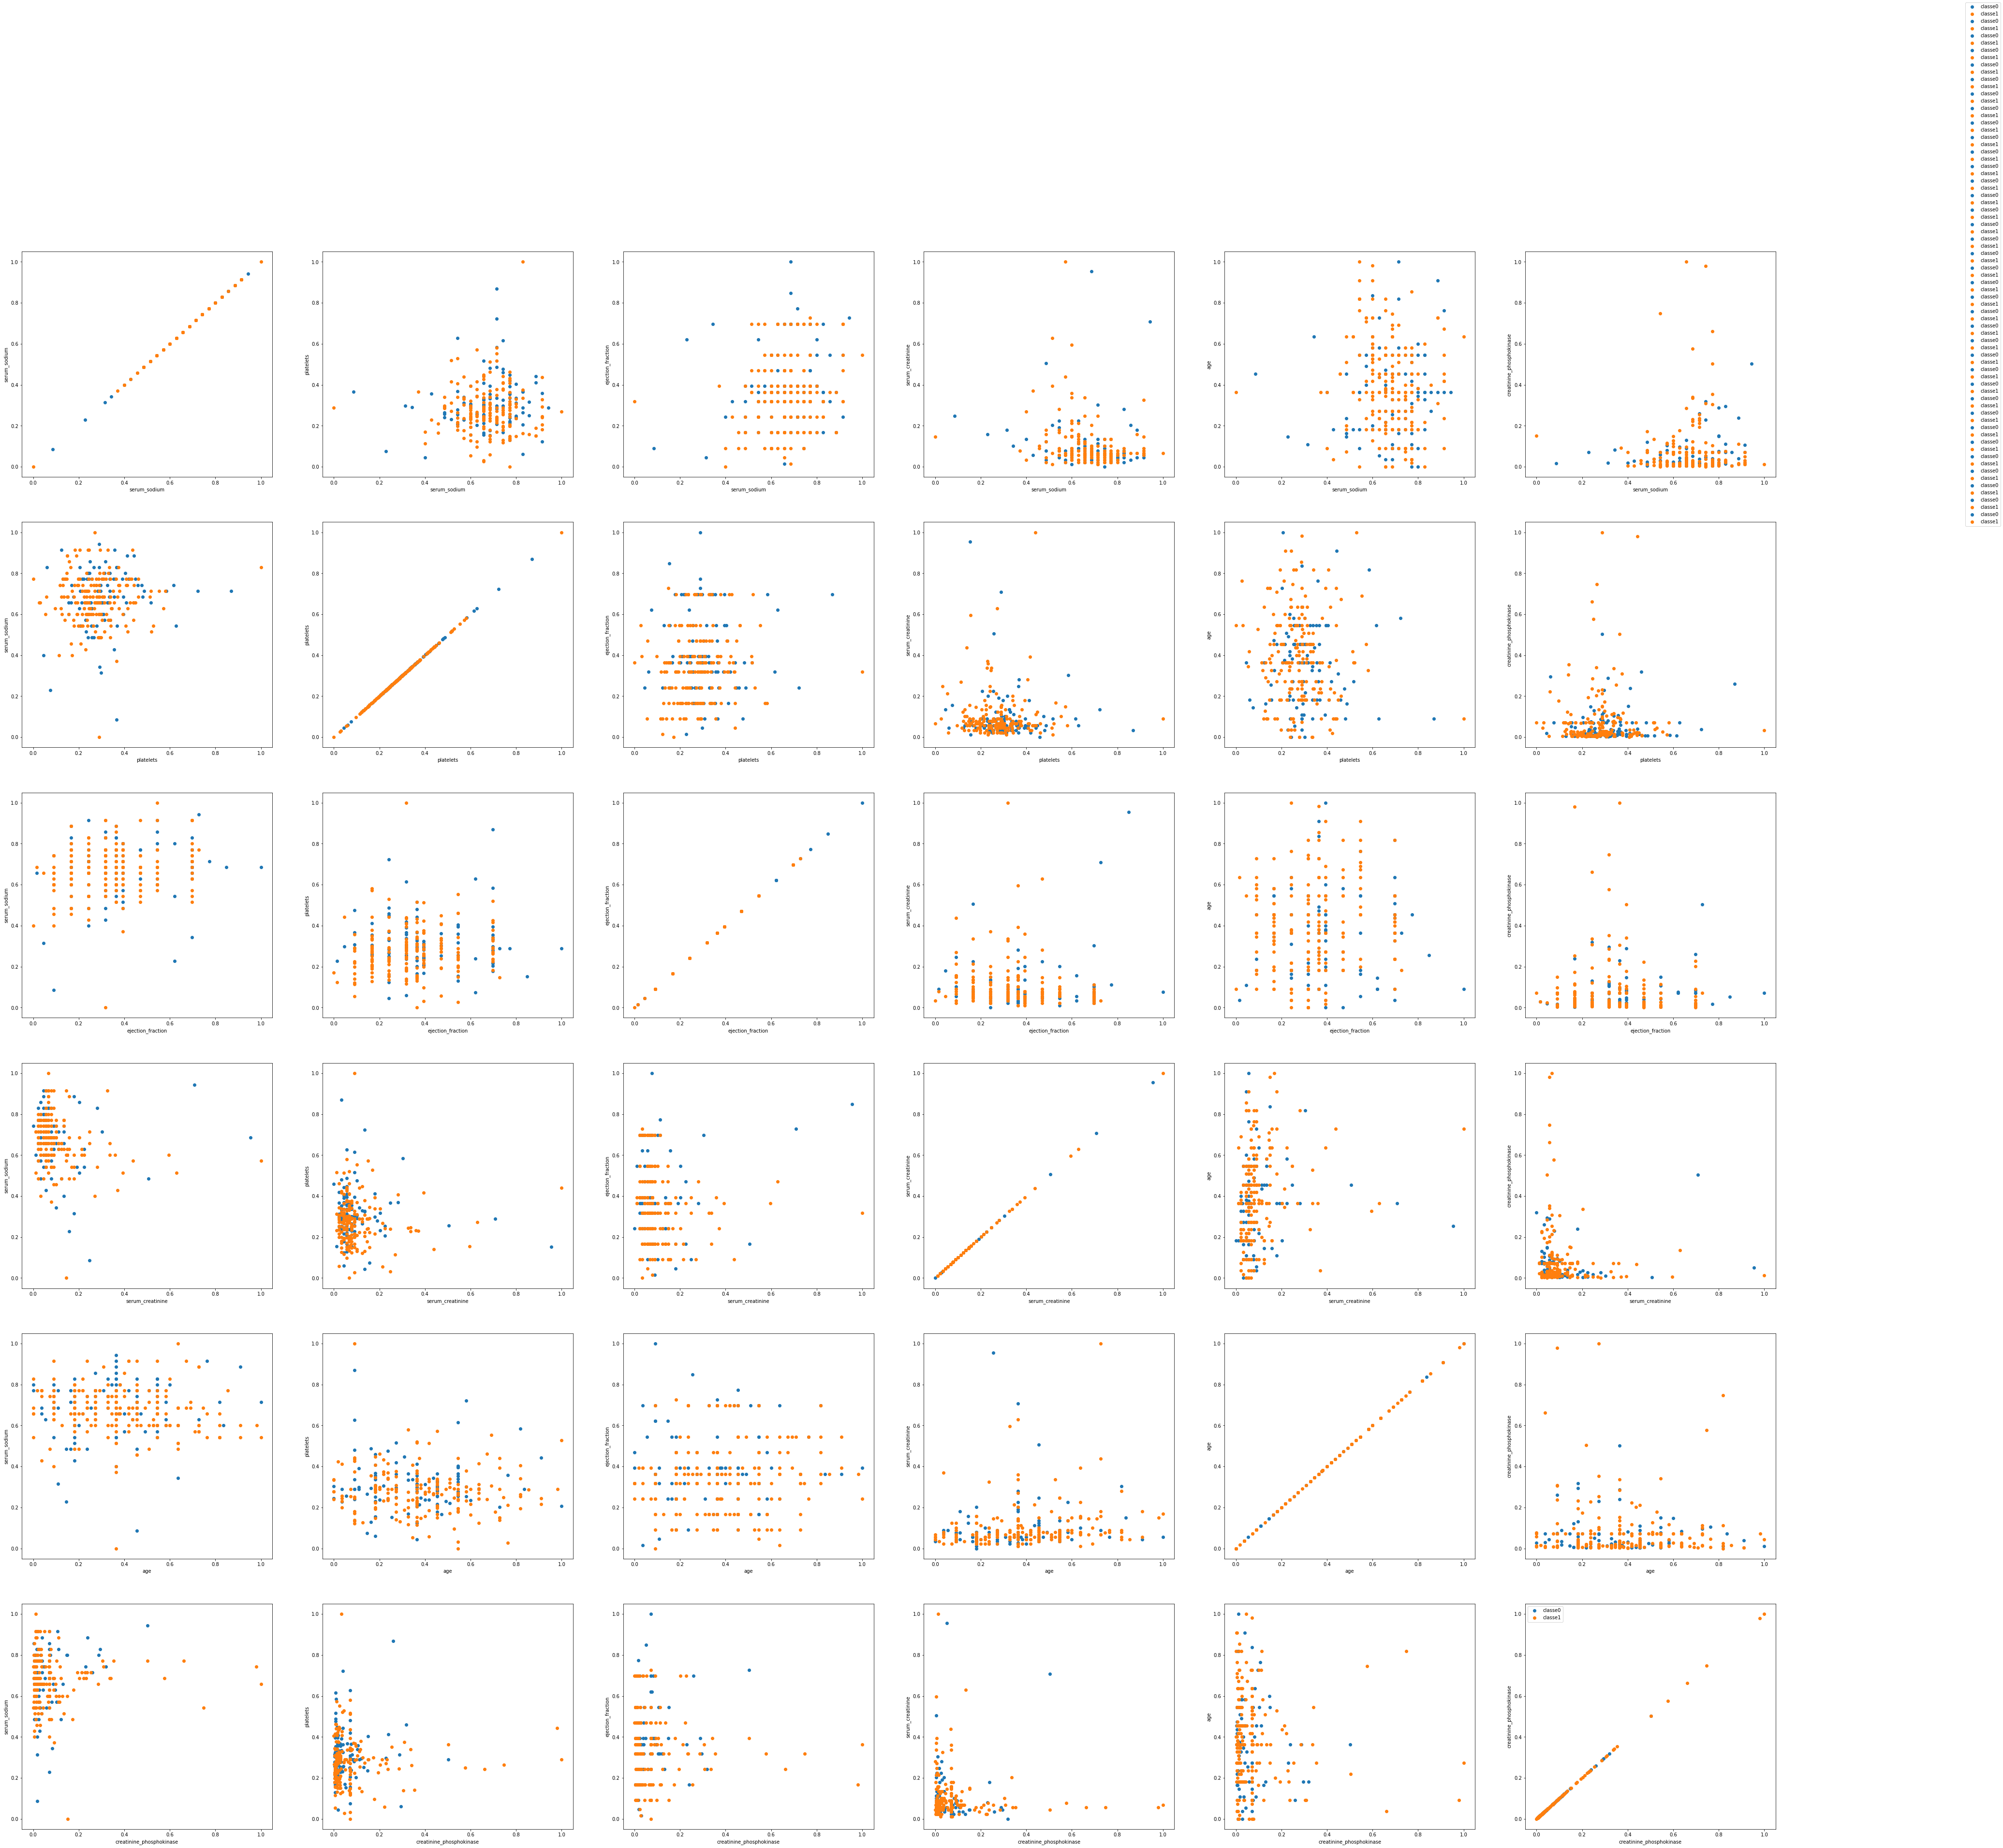

In [ ]:
# plotando comparação dos atributos 
# não usarei colunas de valor 0 ou 1 pois isso atrapalha a vizualização no gráfico de dispersão

colunas_binarias = ['smoking', 'anaemia', 'sex', 'DEATH_EVENT', 'diabetes', 'high_blood_pressure']
colunas = list(set(X.columns) - set(colunas_binarias))

fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(classe0[colunas[i]],classe0[colunas[j]],label='classe0')
    axs[i,j].scatter(classe1[colunas[i]],classe1[colunas[j]],label='classe1')
    axs[i,j].set(xlabel=colunas[i],ylabel=colunas[j])
fig.legend()
plt.legend()
plt.show()



**Conclusão matriz de dispersão**

---
Com essa matriz podemos observar como os atributos se comportam entre os dois grupos. As conclusões mais relevantes são:

*1.*   O atributo serum_creatinine atinge valores mais 
altos na classe1 em relação a classe0.
  * Com base nos valores da serum_creatinine é possível identificar a classe dos "vivos" e dos "mortos" pois, os valores de serum_creatinine são maiores na classe dos vivos, segundo a análise preliminar dos dados. Sendo assim, pode-se supor que a classe1 seja a dos vivos.

*2.*   O atributo creatinine_phosphokinase atinge valores maiores na classe1 em relação a classe0.
  * A classe dos vivos possui outliers com valores maiores, sendo assim, podemos supor que a classe1 pode ser a classe dos vivos, baseada nessa informação.

*3.*   O atributo ejection_fraction atinge valores maiores na classe0 em relação a classe1.
  * A classe dos vivos possui valores maiores de ejection_fraction, mesmo seus outliers são maiores nessa classe. Portanto, com base nessa informação, a classe1 pode ser a dos vivos.

*4.*   O atributo platelets atinge valores maiores, em geral, na classe1 em relação a classe0.
  * A classe dos vivos possui valores maiores de serum_sodium, mesmo seus outliers são maiores nessa classe. Portanto, com base nessa informação, a classe1 pode ser a dos vivos.

*5.*   O atributo serum_sodium atinge valores maiores, em geral, na classe0 em relação a classe1.
  * A classe dos vivos possui valores maiores de serum_sodium, mesmo seus outliers são maiores nessa classe. Portanto, com base nessa informação, a classe1 pode ser a dos vivos.


OBS1: Como muitas dessas informações já foram analisadas usando gráficos de dispersão individuais na análise preliminar dos dados, separei as que mais ajudariam na discriminação das classes.

OBS2: Outliers afetam muito o algoritmo kmeans, porém, pelo menos nesse caso, é possível usar essa características para discriminar as classes, como na análise do creatinine_phosphokinase.










---

In [ ]:
# resetando tamanho das figuras
plt.rcParams["figure.figsize"] = (6.0, 4.0)

In [ ]:
# Criando dataframe apenas para os vivos
vivos = dados[dados['DEATH_EVENT']==0].drop(columns=['DEATH_EVENT']).reset_index(drop=True)
# Criando dataframe apenas para os mortos
mortos = dados[dados['DEATH_EVENT']==1].drop(columns=['DEATH_EVENT']).reset_index(drop=True)

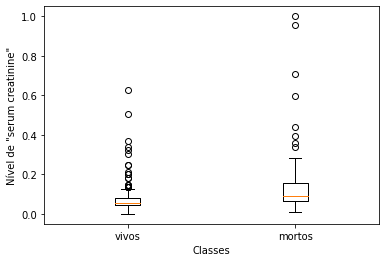

In [ ]:
# boxplot para comparar nível de creatinina sérica no sangue entre a classe de vivos e mortos

# perceba que a classe dos mortos possui, em geral, valores maiores desse atributo 

plt.boxplot([vivos.serum_creatinine, mortos.serum_creatinine], labels=['vivos', 'mortos'])
plt.xlabel('Classes')
plt.ylabel('Nível de "serum creatinine"')
plt.show()

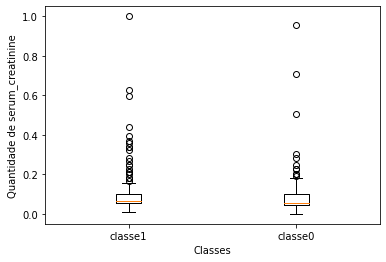

In [ ]:
# justificando parte 1 - conclusão matriz de dispersão

# a classe1, no geral, realmente atinge valores maiores em relação a classe2.

# Isso diz que, provavelmente, a classe1 representa, majoritariamente, a classe dos mortos 
# e a classe0 a dos mortos.

plt.boxplot([classe1.serum_creatinine, classe0.serum_creatinine], labels=['classe1', 'classe0'])
plt.xlabel('Classes')
plt.ylabel('Quantidade de serum_creatinine')
plt.show()

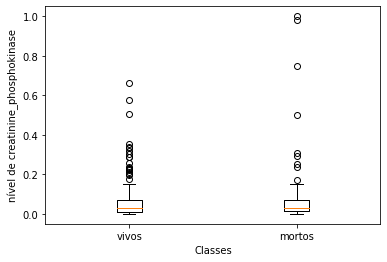

In [ ]:
# boxplot comparando o creatinine_phosphokinase para as classes de vivos e mortos

# perceba que, no geral, a classe dos vivos possui valores mais altos desse atributo em relação a 
# classe dos mortos

plt.boxplot([vivos.creatinine_phosphokinase, mortos.creatinine_phosphokinase], labels=['vivos', 'mortos'])
plt.xlabel('Classes')
plt.ylabel('nível de creatinine_phosphokinase')
plt.show()

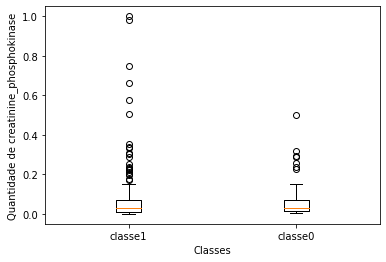

In [ ]:
# justificando parte 2 - conclusão matriz de dispersão

# a classe1, no geral, realmente possui valores maiores em relação a classe0.

# Como a diferença é muito pequena, talvez não seja proveitoso usar essa parte na conclusão, porém,
# o gráfico nos diz que, provavelmente, a classe1 representa, majoritariamente, a dos vivos e 
# a classe0 a dos mortos.

plt.boxplot([classe1.creatinine_phosphokinase, classe0.creatinine_phosphokinase], labels=['classe1', 'classe0'])
plt.xlabel('Classes')
plt.ylabel('Quantidade de creatinine_phosphokinase')
plt.show()

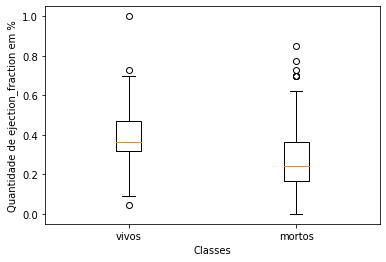

In [ ]:
# boxplot comparando o campo "ejection_fraction" nas classes de vivos e mortos

plt.boxplot([vivos.ejection_fraction, mortos.ejection_fraction], labels=['vivos', 'mortos'])
plt.xlabel('Classes')
plt.ylabel('Quantidade de ejection_fraction em %')
plt.show()

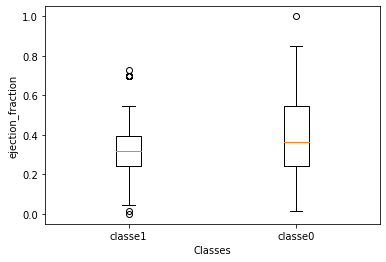

In [ ]:
# justificando parte 3 - conclusão matriz de dispersão

# a classe0, no geral, realmente possui valores maiores de ejection_fraction em relação a classe1.

# Isso diz que, provavelmente, a classe1 representa, majoritariamente, a classe dos mortos 
# e a classe0 a dos vivos.

plt.boxplot([classe1.ejection_fraction, classe0.ejection_fraction], labels=['classe1', 'classe0'])
plt.xlabel('Classes')
plt.ylabel('ejection_fraction')
plt.show()



---

OBS: Os outliers não foram tratados na organização dos dados pois eles são válidos, visto que, basicamente, os dados foram coletados através de amostras de sangue e esses valores oscilam muito naturalmente


---




**Conclusão**

Com toda a análise gráfica feita, é possível afirmar que:

*   A classe1 possui, majoritariamente, instâncias da classe dos mortos.
    * O símbolo 1 representa a classe dos mortos.
*   A classe0 possui, majoritariamente, instâncias da classe dos vivos.
    * O símbolo 0 representa a classe dos vivos
*   É observavel que o número de catalogo das classes são inversos aos do dataframe (dados) usado.


Ainda existem testes númericos a serem feitos. Depois disso, será possível chegar a uma conclusão de se podemos discriminar a classe dos vivos e mortos por insuficiência cardíeca usando algoritmos de agrupamento e, se possível, usar o algoritmo para previsão com novas instâncias.

#### **Avaliando o modelo** 


##### **Métricas quando as labes são conhecidas**


In [ ]:
# calculando acurácia
acuracia = accuracy_score(y,kmeans_labels)
acuracia

0.44481605351170567

In [ ]:
# calculando Índice Rand Ajustado 

# agrupamento que está perto de 0 ou é negativo significa pior agrupamento.

rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

-0.0018582102712868956

In [ ]:
# calculando scores baseados em informação mútua

# agrupamento que está perto de 0 ou é negativo significa pior agrupamento.

mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

-0.0026317329715643684

In [ ]:
# calculando Fowlkes-Mallows scores 

# melhor agrupamento quando valor do índice é próximo de 1
# próximo de 0 significa pior agrumamento
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.5517496230319365



---

Pelo número baixo das métricas acima suponho que talvez o algritmo tenha separado a classes1 (que contém as instâncias do tipo 1) e a classe0 (que contém as instâncias do tipo 0) inversamente em relação ao significo das classe vivos (possui instâncias do tipo 1) e mortos (possui instâncias do tipo 0).

Resumidamente:

* classe1 possui instâncias de 1 mas significa as pessoas que morreram por insuficiência cardíeca sendo que, no dataset original, isso é ao contrário.
* classe2 possui instâncias de 0 mas significa as pessoas que não morreram por insuficiência cardíeca sendo que, no dataset original, isso é ao contrário.

Irei testar as classes inversamente e observar o resultado.

##### **Métricas quando as labels não são conhecidas**


In [ ]:
# copiando X e apagando a coluna DEATH_EVENT que continha a label

X2 = X.copy().drop(columns=['DEATH_EVENT'])
X2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0


In [ ]:
# calculando Índice Davies-Boldin

# 0 é o pior resultado
db = davies_bouldin_score(X,kmeans_labels)
db

1.3196824987734206

In [ ]:
# Coeficiente de Silhueta 

# 0 é o pior resultado
ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.3257663976647647

In [ ]:
# indice de Calinski-Harabasz

# Quanto maior o valor, melhor

ch = calinski_harabasz_score(X,kmeans_labels)
ch

149.33235253055403

##### **Conclusão**





---

Pelo número baixo das métricas quando as labels são conhecidas, suponho que talvez o algritmo tenha separado a classes1 (que contém as instâncias do tipo 1) e a classe0 (que contém as instâncias do tipo 0) inversamente em relação ao significo das classes vivos (possui instâncias do tipo 1) e mortos (possui instâncias do tipo 0).

Resumidamente:

* classe1 possui instâncias de 1 mas significa as pessoas que morreram por insuficiência cardíeca sendo que, no dataset original, isso é ao contrário.
* classe2 possui instâncias de 0 mas significa as pessoas que não morreram por insuficiência cardíeca sendo que, no dataset original, isso é ao contrário.

Irei testar as classes inversamente e observar o resultado.

Os números das métricas usadas para quando não existe label conhecida são melhores. Mas, acredito eu, que esses resultados ainda não sejam satisfatórios.

#### **Avaliando o modelo usando as classes invertidas**

In [ ]:
# mostrando valores da coluna DEATH_EVENT em dados
dados.DEATH_EVENT

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: DEATH_EVENT, Length: 299, dtype: float64

In [ ]:
# invertendo os valores da coluna DEATH_EVENT
dados2 = dados.copy()
dados2['DEATH_EVENT'] = dados2['DEATH_EVENT'].replace([1, 0], [0, 1])
dados2.DEATH_EVENT

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
294    1.0
295    1.0
296    1.0
297    1.0
298    1.0
Name: DEATH_EVENT, Length: 299, dtype: float64

In [ ]:
# preparando o target
y2 = dados2.DEATH_EVENT
y2

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
294    1.0
295    1.0
296    1.0
297    1.0
298    1.0
Name: DEATH_EVENT, Length: 299, dtype: float64

In [ ]:
kmeans_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtyp


##### **Métricas quando as labes são conhecidas**


In [ ]:
# calculando acurácia
acuracia = accuracy_score(y2,kmeans_labels)
acuracia

0.5551839464882943

In [ ]:
# calculando Índice Rand Ajustado 

# agrupamento que está perto de 0 ou é negativo significa pior agrupamento.

rand_score = adjusted_rand_score(y2,kmeans_labels)
rand_score

-0.0018582102712868956

In [ ]:
# calculando scores baseados em informação mútua

# agrupamento que está perto de 0 ou é negativo significa pior agrupamento.

mutual_info = adjusted_mutual_info_score(y2,kmeans_labels)
mutual_info

-0.002631732971564363

In [ ]:
# calculando Fowlkes-Mallows scores 

# melhor agrupamento quando valor do índice é próximo de 1
# próximo de 0 significa pior agrumamento
fm = fowlkes_mallows_score(y2,kmeans_labels)
fm

0.5517496230319365

##### **Conclusão**





---
Apesar de ter tido um aumento na acurácia ao inverter a classe, provando a hipotese feita na vizualização dos resultados, as métricas Índice Rand Ajustado, scores baseados em informação mútua e Fowlkes-Mallows scores não apresentaram melhoras. 

A causa disso, suponho eu, pode estar relacionada a dois motivos:


*   O dataset de problema de classificação binária não foi feito para ser utilizado em conjunto com alguritmos de agrupamento.
*   Existem colunas que podem estar atrapalhando na separação dos grupos. Colunas que não incrementam em quase nada, ou mesmo em nada, na discriminação.

Serão preciso mais testes para verificar a veracidade dessas hipóteses.




### **Agrupamento Hierárquico**

#### **Iniciando e aplicando o modelo**

In [10]:
# iniciando modelo para agrupamento

hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

In [12]:
# mostrando labels

labels_hierarquico

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

#### **Vizualizando os resultados do argupamento**

In [13]:
# transformando as labels em um dataframe
grupos2 = pd.DataFrame(labels_hierarquico)
grupos2

,0
0,0
1,1
2,1
3,1
4,0
...,...
294,0
295,1
296,0
297,1


In [30]:
# adicionando as labels ao teste para fins de visualização

# X3.shape dá a dimensionalidade e X3.shape[1] retorna  o número de colunas + 1, basicamente.

# DEATH_EVENT é o campo de previsão de morte por insuficiência cardíeca
# no dataset original

X3 = X.copy()
X3.insert((X3.shape[1]),'DEATH_EVENT',grupos2)
X3

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,1
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,1


In [31]:
# como, até agora, não sabemos qual label pertence a qual classe nos grupos
# chamaremos de classe0 (para as classes com 0) e classe1 (para as classes com 1)

# coloquei um "b" depois de classe0 e classe1 para não causar conflitos em outras execuçõse 
# do notebook

classe0b = X3[X3['DEATH_EVENT']==0]
classe1b = X3[X3['DEATH_EVENT']==1]

In [16]:
# redimensionando as figuras para que a vizualização do gráfico 3d seja melhor
plt.rcParams["figure.figsize"] = (14,11)

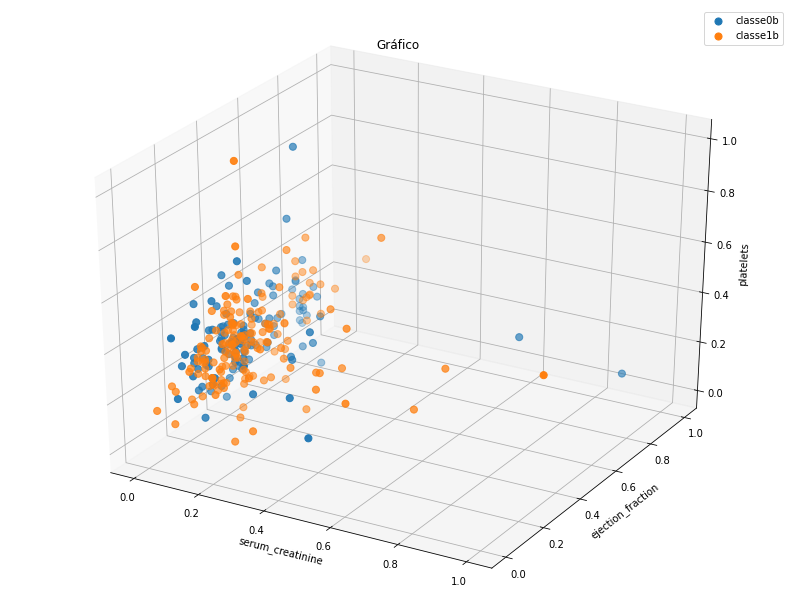

In [19]:
# escolhi os atributos serum_creatinine e ejection_fraction
# pois, na análise feita preliminarmente (link do notebook no cabeçalho), esses
# são os atributos mais promissores para discriminar as classes. Usarei, também,
# o atributo platelets e, então, plotar um gráfico 3d (o atributo platelets também é 
# adequado para a discriminação).

ax = plt.axes(projection='3d')
ax.scatter3D(classe0b.serum_creatinine,classe0b.ejection_fraction,classe0b.platelets,s=50,label='classe0b')
ax.scatter3D(classe1b.serum_creatinine,classe1b.ejection_fraction,classe1b.platelets,s=50,label='classe1b')
plt.legend()
ax.set_xlabel('serum_creatinine')
ax.set_ylabel('ejection_fraction')
ax.set_zlabel('platelets')
plt.title('Gráfico')
plt.show()


**Conclusão gráfico 3d**

---


Em uma análise preliminar, podemos observar que a classe1b possui valores de serum_creatinine e ejection_fraction maiores em relação a classe0b. Isso é uma evidência de que a classe0b talvez seja a classe dos mortos por insuficiência cardíeca, porém, ainda não existem provas suficientes para fazer essa conclusão.

O resultado se assemelha com o do agrupamento por partição, o que certamente não é um bom sinal. 


---





In [33]:
# redimensionando as figuras para que a vizualização dos gráficos a seguir seja melhor
plt.rcParams["figure.figsize"] = (65,60)

In [35]:
# resetando tamanho das figuras
plt.rcParams["figure.figsize"] = (6.0, 4.0)

#### **Avaliando o modelo** 


##### **Métricas quando as labes são conhecidas**


In [24]:
# calculando acurácia
acuracia2 = accuracy_score(y,labels_hierarquico)
acuracia2

0.46153846153846156

In [25]:
# calculando Índice Rand Ajustado 

# agrupamento que está perto de 0 ou é negativo significa pior agrupamento.

rand_score2 = adjusted_rand_score(y,labels_hierarquico)
rand_score2

-0.00010142121678390072

In [26]:
# calculando scores baseados em informação mútua

# agrupamento que está perto de 0 ou é negativo significa pior agrupamento.

mutual_info2 = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info2

-0.0021944131916887236

In [27]:
# calculando Fowlkes-Mallows scores 

# melhor agrupamento quando valor do índice é próximo de 1
# próximo de 0 significa pior agrumamento
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.5359696262076302

##### **Métricas quando as labels não são conhecidas**


In [37]:
# copiando X e apagando a coluna DEATH_EVENT que continha a label

X4 = X3.copy().drop(columns=['DEATH_EVENT'])
X4

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0


In [42]:
# calculando Índice Davies-Boldin

# 0 é o pior resultado
db2 = davies_bouldin_score(X3,labels_hierarquico)
db2

1.5465702440045839

In [43]:
# Coeficiente de Silhueta 

# 0 é o pior resultado
ss2 = silhouette_score(X3,labels_hierarquico,metric='euclidean')
ss2

0.2818334926434605

In [44]:
# indice de Calinski-Harabasz

# Quanto maior o valor, melhor

ch2 = calinski_harabasz_score(X,labels_hierarquico)
ch2

53.55241224867766

#### **Conclusão sobre as métricas de análise**





---

Com a análise do agrupamento hierárquico, quando comparado com o agrupamento por partção, notasse os seguintes resultados:

Para as métricas com labels conhecidas
*   Maior acurácia
*   Maior Índice Rand Ajustado 
*   Maior score baseado em informação mútua
*   Menor Fowlkes-Mallows score

Para as métricas com labels desconhecidas
*   Maior Índice Davies-Boldin
*   Menor Coeficiente de Silhueta 
*   Menor indice de Calinski-Harabasz

Os resultados obtidos no agrupamento hierárquico não foram satisfatórios, pois, mesmo com um certo melhoramento, que foi singelo, em algumas métricas, outras delas pioraram drasticamente.




## **Conclusão**





---


Após a comparação feita com os algoritmos de agrupamento, partição e hierarquico, é possível concluir que o uso desses algoritmos para a distinção de classes, vivsos e mortos, no dataset de morte por insuficência cardíeca é inapropriado, tendo em vista os resultados avaliados, que não foram bons. Portanto, é recomendado que, para esse dataset e esse problema, sejam usados algoritmos de classificação, visto que podem atingir valores acima de 75% de acertos.